In [31]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#Importing datasets
cab_data = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer_id = pd.read_csv('Customer_ID.csv')
transaction_id = pd.read_csv('Transaction_ID.csv')

In [33]:
#Exploring data
cab_data.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [34]:
#Finding most popular Company for each city
city_list=[]
pink_cab_city =[]
yellow_cab_city = []
cities = cab_data['City'].tolist()
cities_set = []
for x in cities:
    if x not in cities_set:
        cities_set.append(x)
cabs = cab_data['Company'].tolist()
for i in range(0,len(cities_set)):
    temp_city = cities_set[i]
    pink_cabs = 0
    yellow_cabs = 0
    for j in range(0,len(cabs)):
        if cities[j]==temp_city:
            if cabs[j]=='Pink Cab':
                pink_cabs+=1
            if cabs[j]=='Yellow Cab':
                yellow_cabs+=1
    
    pink_cab_city.append(pink_cabs)
    yellow_cab_city.append(yellow_cabs)
    city_list.append(temp_city)


print(pink_cab_city)
print(yellow_cab_city)
print(city_list)


[1762, 1868, 5186, 9361, 1380, 1394, 19865, 2002, 1841, 13967, 1513, 864, 682, 1334, 10672, 2732, 3797, 799, 3692]
[5795, 3028, 24506, 47264, 5637, 2431, 28168, 4452, 1169, 85918, 2469, 1200, 631, 1033, 9816, 5265, 4722, 1132, 40045]
['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX', 'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN', 'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA', 'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY', 'TUCSON AZ', 'WASHINGTON DC']


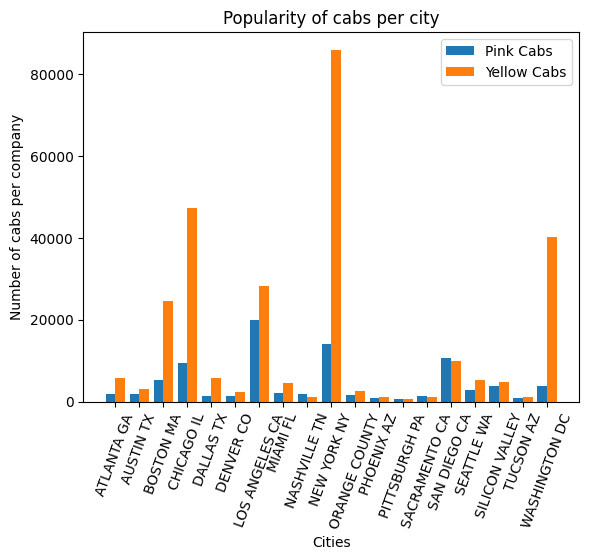

In [35]:
#Plotting double bar graph
X_axis = np.arange(len(city_list))
plt.bar(X_axis - 0.2, pink_cab_city, 0.4, label = 'Pink Cabs')
plt.bar(X_axis + 0.2, yellow_cab_city, 0.4, label = 'Yellow Cabs')

plt.xticks(X_axis, city_list)
plt.xticks(rotation=70)
plt.xlabel("Cities")
plt.ylabel("Number of cabs per company")
plt.title("Popularity of cabs per city")
plt.legend()
plt.show()

<BarContainer object of 20 artists>

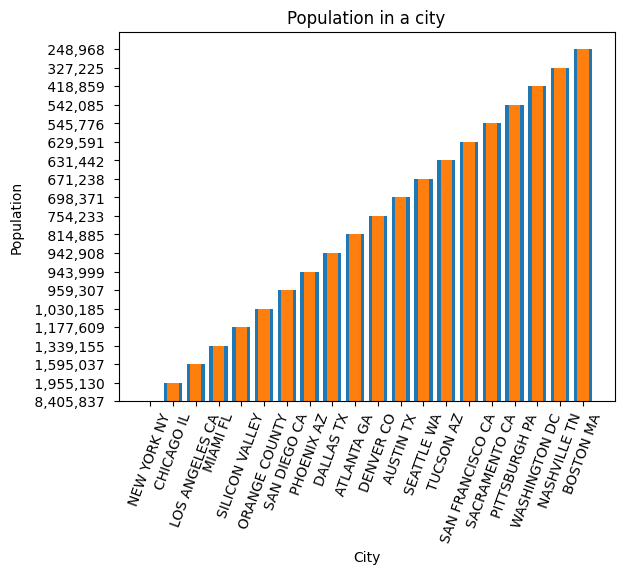

In [36]:
#Population per city plot
city.head(20)
fig, ax = plt.subplots()
ax.set_ylabel('Population')
ax.set_title('Population in a city')
ax.set_xlabel('City')
ax.bar(city['City'], city['Population'])
plt.xticks(rotation=70)
plt.bar(city['City'], city['Population'], width=0.5)


<BarContainer object of 20 artists>

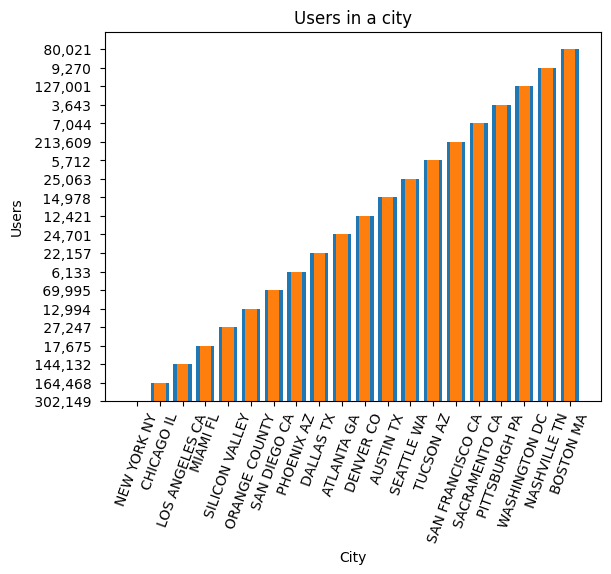

In [37]:
#Usage based on city
fig, ax = plt.subplots()
ax.set_ylabel('Users')
ax.set_title('Users in a city')
ax.set_xlabel('City')
ax.bar(city['City'], city['Users'])
plt.xticks(rotation=70)
plt.bar(city['City'], city['Users'], width=0.5)

In [38]:
#Merging datasets to create a master dataset
temp_data = pd.merge(cab_data, transaction_id)
temp_data_1 = pd.merge(temp_data,customer_id)
Master_data = pd.merge(temp_data_1, city)

In [39]:
pd.set_option('display.max_rows',0)
Master_data.shape

(359392, 14)

In [40]:
#Information of Master dataset
Master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 41.1+ MB


In [41]:
#Number of males and females using a cab
Master_data['Gender'].value_counts()

Male      205912
Female    153480
Name: Gender, dtype: int64

In [42]:
#Unique values of columns in a dataset
Master_data.nunique()

Transaction ID        359392
Date of Travel          1095
Company                    2
City                      19
KM Travelled             874
Price Charged          99176
Cost of Trip           16291
Customer ID            46148
Payment_Mode               2
Gender                     2
Age                       48
Income (USD/Month)     22725
Population                19
Users                     19
dtype: int64

#From above analysis we observe that, Transaction ID is unique for the entire dataset (Transaction ID is the primary key). 

In [43]:
#Unique values for given columns
print(f"Company = {Master_data['Company'].unique()}")
print(f"Gender = {Master_data['Gender'].unique()}")
print(f"Payment_mode = {Master_data['Payment_Mode'].unique()}")
print(f"City = {Master_data['City'].unique()}")
print(f"Users = {Master_data['Users'].unique()}")


Company = ['Pink Cab' 'Yellow Cab']
Gender = ['Male' 'Female']
Payment_mode = ['Card' 'Cash']
City = ['ATLANTA GA' 'AUSTIN TX' 'BOSTON MA' 'CHICAGO IL' 'DALLAS TX' 'DENVER CO'
 'LOS ANGELES CA' 'MIAMI FL' 'NASHVILLE TN' 'NEW YORK NY' 'ORANGE COUNTY'
 'PHOENIX AZ' 'PITTSBURGH PA' 'SACRAMENTO CA' 'SAN DIEGO CA' 'SEATTLE WA'
 'SILICON VALLEY' 'TUCSON AZ' 'WASHINGTON DC']
Users = [' 24,701 ' ' 14,978 ' ' 80,021 ' ' 164,468 ' ' 22,157 ' ' 12,421 '
 ' 144,132 ' ' 17,675 ' ' 9,270 ' ' 302,149 ' ' 12,994 ' ' 6,133 '
 ' 3,643 ' ' 7,044 ' ' 69,995 ' ' 25,063 ' ' 27,247 ' ' 5,712 '
 ' 127,001 ']


In [44]:
#Missing values in the dataset
Master_data.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [45]:
Master_data.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
5,10324737,43224,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,"814,885","24,701"
6,10395626,43400,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,"814,885","24,701"
7,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701"
8,10079404,42634,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,"814,885","24,701"
9,10186994,42909,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,"814,885","24,701"


In [46]:
#Frequency of KM. travelled in the dataset
pd.set_option('display.max_rows',1000)
Master_data['KM Travelled'].value_counts()

33.60    1536
24.00    1080
22.80    1075
35.70    1069
16.80    1065
37.44    1062
39.60    1056
28.08     972
21.85     769
18.00     754
34.56     748
19.04     748
6.72      748
27.00     745
34.20     745
42.00     742
39.20     739
29.70     739
46.80     737
13.20     735
31.20     735
44.46     735
14.70     734
26.88     732
10.80     732
36.48     731
16.66     731
38.85     731
40.80     730
19.20     730
29.12     729
29.00     729
40.95     728
18.36     728
31.68     728
22.00     727
6.00      725
7.84      725
42.18     724
28.80     724
20.16     723
4.80      723
19.95     722
12.48     722
33.32     721
15.68     720
21.60     719
14.04     717
32.64     716
43.20     715
17.28     715
39.78     714
33.00     713
28.56     713
43.29     713
32.48     712
19.00     712
23.00     712
37.74     711
25.74     710
26.00     710
12.00     710
36.72     705
28.00     705
35.64     704
8.40      704
17.10     704
45.60     704
25.20     703
20.52     703
25.30     703
9.60  

In [47]:
#Information in dataset
Master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 41.1+ MB


In [48]:
#Transforming population and users into int dtype
arr_population = list(Master_data['Population'])
arr_users = list(Master_data['Users'])

In [49]:
temp_int_population = []
temp_int_users = []
for i in range(0,len(arr_population)):
    str_population = arr_population[i].replace(',',"")
    str_users = arr_users[i].replace(',',"")
    temp_int_population.append(int(str_population))
    temp_int_users.append(int(str_users))

In [50]:
Master_data['New Population'] = temp_int_population
Master_data['New Users'] = temp_int_users

In [51]:
Master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
 14  New Population      359392 non-null  int64  
 15  New Users           359392 non-nul

In [52]:
columns_to_drop = ['Population','Users']
Master_data = Master_data.drop(columns_to_drop, axis=1)
Master_data.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),New Population,New Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701
5,10324737,43224,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,814885,24701
6,10395626,43400,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,814885,24701
7,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701
8,10079404,42634,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885,24701
9,10186994,42909,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,814885,24701


In [53]:
Master_data = pd.get_dummies(Master_data)

In [54]:
#Final Merged dataset
Master_data.head(10)

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),New Population,New Users,...,City_SACRAMENTO CA,City_SAN DIEGO CA,City_SEATTLE WA,City_SILICON VALLEY,City_TUCSON AZ,City_WASHINGTON DC,Payment_Mode_Card,Payment_Mode_Cash,Gender_Female,Gender_Male
0,10000011,42377,30.45,370.95,313.6350,29290,28,10813,814885,24701,...,0,0,0,0,0,0,1,0,0,1
1,10351127,43302,26.19,598.70,317.4228,29290,28,10813,814885,24701,...,0,0,0,0,0,0,0,1,0,1
2,10412921,43427,42.55,792.05,597.4020,29290,28,10813,814885,24701,...,0,0,0,0,0,0,1,0,0,1
3,10000012,42375,28.62,358.52,334.8540,27703,27,9237,814885,24701,...,0,0,0,0,0,0,1,0,0,1
4,10320494,43211,36.38,721.10,467.1192,27703,27,9237,814885,24701,...,0,0,0,0,0,0,1,0,0,1
5,10324737,43224,6.18,138.40,87.5088,27703,27,9237,814885,24701,...,0,0,0,0,0,0,0,1,0,1
6,10395626,43400,13.39,167.03,141.9340,27703,27,9237,814885,24701,...,0,0,0,0,0,0,1,0,0,1
7,10000013,42371,9.04,125.20,97.6320,28712,53,11242,814885,24701,...,0,0,0,0,0,0,0,1,0,1
8,10079404,42634,39.60,704.30,494.2080,28712,53,11242,814885,24701,...,0,0,0,0,0,0,1,0,0,1
9,10186994,42909,18.19,365.63,246.6564,28712,53,11242,814885,24701,...,0,0,0,0,0,0,1,0,0,1


The EDA results are as follows:
1. The data is taken from 20 cities in the USA.
2. The number of users in a city is directly proportional to the population of that city. That means the city with the highest population has the highest number of users.
3. Though NY doesn't have the highest population, yet it has the highest taxi usage out of which the yellow cab is most popular.
4. In general, yellow cabs company is the most popular in all cities except SAN DIEGO CA where pink cabs perform slightly better.
5. Each customer can have more than one transactions as there are only 46168 customers.
6. The maximum transactions have been by people who have travelled 33.60 Km and the least transactions have been for people who have travelled 21.84 km.
7. The price can be the target variable.
8. The number of males using the cab is much greater than females.
